# Data generation

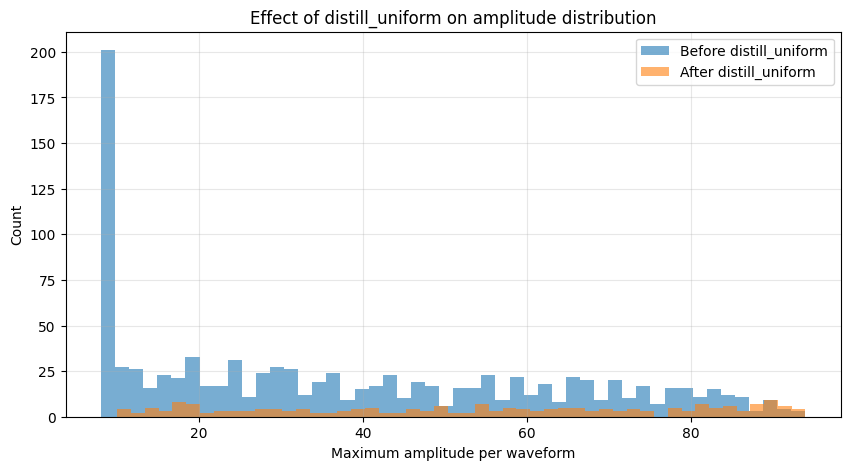

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sipm_signals.signals as sgn



# Generate a batch of waveforms (like gen_Data does)
num_samples = 1000
raw_data = np.empty((num_samples, sgn.ADC_SAMPLES), dtype=np.uint8)
for i in range(num_samples):
    raw_data[i, :] = sgn.sipm_inp()

# --- compute maxima before uniformization ---
maxima_raw = np.max(raw_data, axis=1)

# --- apply distill_uniform ---
uniform_data = sgn.distill_uniform(raw_data, min_amp=10, sample_size=200)
maxima_uniform = np.max(uniform_data, axis=1)

# --- plot histograms ---
plt.figure(figsize=(10, 5))
plt.hist(maxima_raw, bins=50, alpha=0.6, label='Before distill_uniform')
plt.hist(maxima_uniform, bins=50, alpha=0.6, label='After distill_uniform')
plt.xlabel('Maximum amplitude per waveform')
plt.ylabel('Count')
plt.title('Effect of distill_uniform on amplitude distribution')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
